## Growth Rate vs Total Population/Km2 in Indonesia (Reviewed by Island)

In [44]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

def clean():
    df = pd.read_excel('penduduk.xlsx', header=2 ,skipfooter=5)
    df = df[['Unnamed: 0', '2018.2', '2019.2', '2020.2']]
    df = df.rename(columns={'Unnamed: 0':'Province', '2018.2':'Total 2018', 
                    '2019.2':'Total 2019', '2020.2':'Total 2020'})

    df['Island'] = df['Province']
    (df['Island'].iloc[0:10]) = (df['Island'].iloc[0:10]).replace('[A-Z].+','SUMATERA',regex=True)
    (df['Island'].iloc[10:16]) = (df['Island'].iloc[10:16]).replace('[A-Z].+','JAWA',regex=True)
    (df['Island'].iloc[16:17]) = (df['Island'].iloc[16:17]).replace('[A-Z].+','BALI',regex=True)
    (df['Island'].iloc[17:19]) = (df['Island'].iloc[17:19]).replace('[A-Z].+','NUSA TENGGARA',regex=True)
    (df['Island'].iloc[19:24]) = (df['Island'].iloc[19:24]).replace('[A-Z].+','KALIMANTAN',regex=True)
    (df['Island'].iloc[24:30]) = (df['Island'].iloc[24:30]).replace('[A-Z].+','SULAWESI',regex=True)
    (df['Island'].iloc[30:32]) = (df['Island'].iloc[30:32]).replace('[A-Z].+','MALUKU',regex=True)
    (df['Island'].iloc[32:34]) = (df['Island'].iloc[32:34]).replace('[A-Z].+','PAPUA',regex=True)

    df = df.set_index('Island')

    df1 = df.groupby(level=0)['Total 2018', 'Total 2019', 'Total 2020'].sum()
    df2 = df.groupby('Island')['Province'].agg(ProvinceCount=len)
    df = df2.merge(df1, left_on='Island', right_on='Island')

    df['Total Population'] = df.sum(axis=1)

    df['Growth (%)'] = ((df['Total 2020'] - df['Total 2018']) / df['Total 2018'] * 100).round(2)

    df['Total 2018'] = (df['Total 2018'] * 1000).astype(int)
    df['Total 2019'] = (df['Total 2019'] * 1000).astype(int)
    df['Total 2020'] = (df['Total 2020'] * 1000).astype(int)
    df['Total Population'] = (df['Total Population'] * 1000).astype(int)
    return df


def area():

    df = clean()

    areadict ={
    'JAWA': 128297,
    'SUMATERA': 473481,
    'SULAWESI': 180681,
    'KALIMANTAN': 743440,
    'NUSA TENGGARA': 60085,
    'BALI':5780,
    'PAPUA':786000,
    'MALUKU':75505
    }

    df['Area'] = df.index
    df['Area'] = df['Area'].replace(areadict)
    df['Population/Km2'] = df['Total Population'] / df['Area']
    df['Population/Km2'] = df['Population/Km2'].sort_values()
    return df


def size():

    df = area()

    size = []

    for index, rows in df.iterrows():
        if rows['Population/Km2'] < 100:
            size.append(50)
        elif rows['Population/Km2'] < 500:
            size.append(200)
        elif rows['Population/Km2'] < 1000:
            size.append(300)
        elif rows['Population/Km2'] < 3000:
            size.append(550)
        else:
            size.append(900)

    df['Size'] = size
    return df


def final():
    df = size()
    df = df.sort_values('Population/Km2')
    return df

final()

,ProvinceCount,Total 2018,Total 2019,Total 2020,Total Population,Growth (%),Area,Population/Km2,Size
Island,,,,,,,,,
PAPUA,2,4241599,4310700,4379100,12933400,3.24,786000,16.454707,50
KALIMANTAN,5,16016700,16227100,16432900,48681700,2.60,743440,65.481680,50
MALUKU,2,2968300,3004200,3039399,9013900,2.40,75505,119.381498,200
SULAWESI,6,19354200,19555000,19751300,58666500,2.05,180681,324.696565,200
SUMATERA,10,57700600,58455800,59196799,175363199,2.59,473481,370.370087,200
NUSA TENGGARA,2,10438000,10589599,10739300,31768899,2.89,60085,528.732612,300
BALI,1,4309200,4362000,4414400,13086600,2.44,5780,2264.117647,550
JAWA,6,149133000,150407500,151650199,451196699,1.69,128297,3516.814103,900


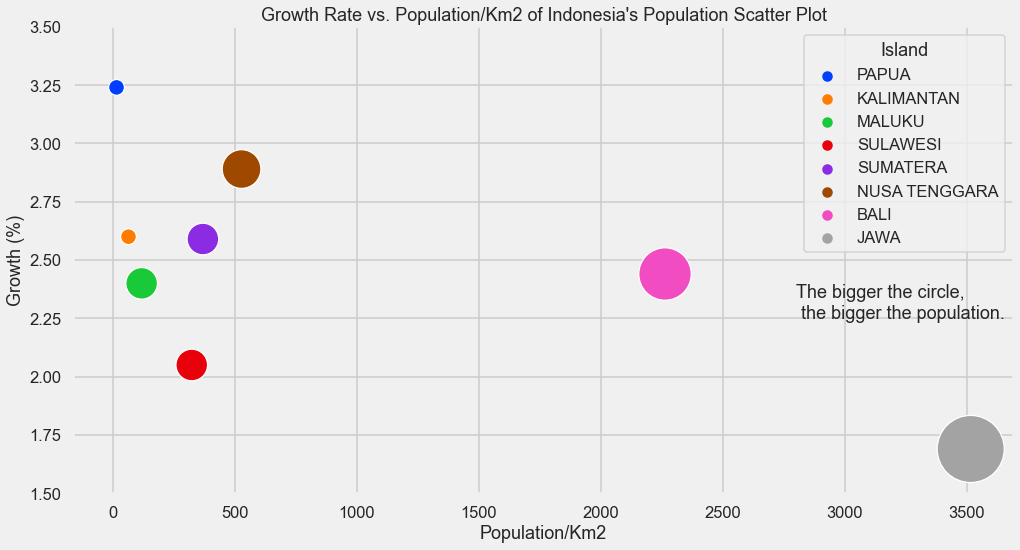

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

df = final()

fig,ax = plt.subplots(figsize=(15,8))
plt.style.use('fivethirtyeight')
sns.set_context('talk')

ax1 = sns.scatterplot(x = df['Population/Km2'], y=df['Growth (%)'], s=df['Size']*5, ax=ax, hue=df.index, palette='bright')

plt.ylim(1.5,3.5)
plt.title("Growth Rate vs. Population/Km2 of Indonesia's Population Scatter Plot")
plt.annotate('The bigger the circle,\n the bigger the population.', [2800,2.25])
plt.show()

## Investment Portfolio Performance From 2013 - 2019

In [3]:
import pandas as pd

df = pd.read_csv('portfolio_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df = df.drop('Date', axis=1)

df.head(1)
df.tail(1)
(df.iloc[-1] - df.iloc[0])/df.iloc[0] * 100

AMZN     641.296388
DPZ      433.023531
BTC     7602.428309
NFLX    1036.287595
Year       0.298063
dtype: float64

In [4]:
df.head(1)

,AMZN,DPZ,BTC,NFLX,Year
0,248.229996,51.190983,106.25,30.415714,2013


In [5]:
df.tail(1)

,AMZN,DPZ,BTC,NFLX,Year
1519,1840.119995,272.859985,8183.830078,345.609985,2019


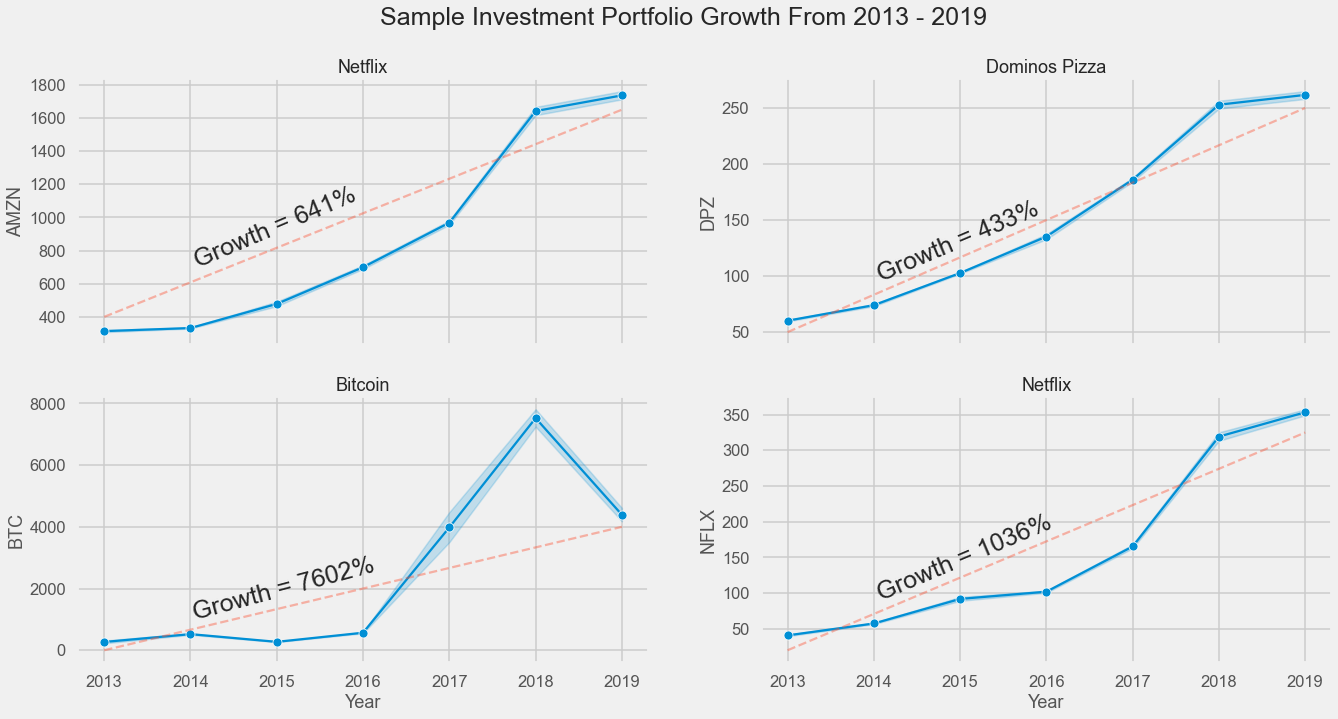

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig1, ax = plt.subplots(2, 2, sharex=True, sharey=False, figsize=(20,10))
fig1.suptitle('Sample Investment Portfolio Growth From 2013 - 2019', size=25)
plt.style.use('fivethirtyeight')
sns.set_context('talk')

ax[0,0].set_title('Netflix')
sns.lineplot(ax=ax[0,0],x=df['Year'], y=df['AMZN'], marker='o')
sns.lineplot(ax=ax[0,0],x=[2013,2019], y=[400,1650], alpha=0.4, linestyle='dashed')
ax[0,0].annotate('Growth = 641%', xy=(2014,700), rotation=23, size=25)

ax[0,1].set_title('Dominos Pizza')
sns.lineplot(ax=ax[0,1], x=df['Year'], y=df['DPZ'], marker='o')
sns.lineplot(ax=ax[0,1],x=[2013,2019], y=[50,250], alpha=0.4, linestyle='dashed')
ax[0,1].annotate('Growth = 433%', xy=(2014,95), rotation=23, size=25)

ax[1,0].set_title('Bitcoin')
sns.lineplot(ax=ax[1,0], x=df['Year'], y=df['BTC'], marker='o')
sns.lineplot(ax=ax[1,0],x=[2013,2019], y=[0,4000], alpha=0.4, linestyle='dashed')
ax[1,0].annotate('Growth = 7602%', xy=(2014,1000), rotation=15, size=25)

ax[1,1].set_title('Netflix')
sns.lineplot(ax=ax[1,1], x=df['Year'], y=df['NFLX'], marker='o')
sns.lineplot(ax=ax[1,1],x=[2013,2019], y=[20,325], alpha=0.4, linestyle='dashed')
ax[1,1].annotate('Growth = 1036%', xy=(2014,90), rotation=23, size=25)

plt.show()